In [1]:
#Move one folder back
cd ..

d:\Portfolio\Engineer\computer science\machine_learning_git\clasification\Google Art and Culture


In [4]:
import pandas as pd
import matplotlib as plt
import re
from src import Regex

df = pd.read_excel('data\processed\data_unpacked.xlsx')

# 2. Data Understanding

In [40]:
# Convert all columns in string and in lowercase
df = df.astype(str)
df = df.apply(lambda x: x.str.lower())

## 2.2 Describe data

### Get some samples

In [35]:
df.sample(5)

,url,title,creator,created,artist,category,dimension
8557,https://lh3.googleusercontent.com/ci/acqfvf00n...,toleware tin coffee pot,max soltmann,c. 1936,nan,white,nan
9713,https://lh3.googleusercontent.com/ci/acqfvf2f4...,untitled,jean baptiste edouard detaille,nan,nan,yellow,w15 x h18.25 in.
3097,https://lh3.googleusercontent.com/jambdzkd2olr...,pleasures of love,nan,around 1718 - 1719,nan,brown,w750 x h600 cm
6558,https://lh3.googleusercontent.com/ci/acqfvf0fq...,ni ye and tea,chen hui,nan,nan,red,w90 x h120 cm
8847,https://lh3.googleusercontent.com/ci/acqfvf0tl...,destructive paradox no.7 moment,carl plate,1960,nan,white,122.0 x 91.4 cm board; 127.7 x 97.3 x 4.2 cm ...


### Check shape and columns

In [41]:
print('shape', df.shape,'\n')
print('columns', df.columns.to_list(),'\n')

shape (10282, 7) 

columns ['url', 'title', 'creator', 'created', 'artist', 'category', 'dimension'] 



## 2.3 Explore data 

<AxesSubplot:>

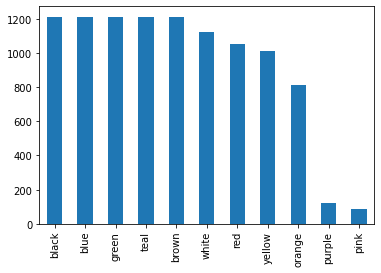

In [42]:
df['category'].value_counts().plot(kind='bar')

### 2.4 Verify data quality

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10282 entries, 0 to 10281
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   url        10282 non-null  object
 1   title      10282 non-null  object
 2   creator    10282 non-null  object
 3   created    10282 non-null  object
 4   artist     10282 non-null  object
 5   category   10282 non-null  object
 6   dimension  10282 non-null  object
dtypes: object(7)
memory usage: 562.4+ KB


# 3. Data Preparation

## 3.1 Data Selection

In [44]:
#Merge creator and artist features into one
def join_creator_artist(row):
    if(not pd.isna(row['creator'])):
        return row['creator']
    if(not pd.isna(row['artist'])):
        return row['artist']
    return None

df2 = df.sample(n=10, random_state=1)
df2['creator']=df.apply(join_creator_artist, axis=1)
df2.drop(['artist'], axis=1)

,url,title,creator,created,category,dimension
3720,https://lh3.googleusercontent.com/ltqf4jbsd0un...,olive orchard,vincent van gogh,1889,green,w920.75 x h730.25 in (unframed)
7991,https://lh3.googleusercontent.com/ci/acqfvf3zv...,hillside cottage,george w. sotter,nan,teal,"w26 x h22 inches, w26 x h22 inches"
6678,https://lh3.googleusercontent.com/ci/acqfvf0zl...,untitled (the award winners),reinhold rossig,ca. 1955,red,120.0 x 100.0 cm
9053,https://lh3.googleusercontent.com/ci/acqfvf2xa...,whale oil lamp,nan,1825–45,white,h. 3 7/8 in. (9.8 cm)
9697,https://lh3.googleusercontent.com/ipeqpddctqed...,bolivia and western amazzonia,nan,1565/1575,yellow,w73 x h117 cm (complete)
5103,https://lh3.googleusercontent.com/7um6flk2jlop...,k.o'd by griffo,robert dickerson,1953,orange,w1395 x h1228 cm
2182,https://lh3.googleusercontent.com/ci/acqfvf3jc...,honor the parents of the house first,svay ken,nan,blue,w60 x h50 cm
10144,https://lh3.googleusercontent.com/ci/acqfvf3cx...,composition with bust,nan,nan,yellow,w82 x h48 cm
2617,https://lh3.googleusercontent.com/ci/acqfvf1j5...,group of three girls,amrita sher-gil,1935,brown,"oil on canvas, 73.5cm x 99.5cm"
6643,https://lh3.googleusercontent.com/ci/acqfvf1ij...,nemesis,cyril coetzee,1983,red,983 mm x 608mm


## 3.2 Data Cleaning

In [45]:
def clean_created(row):
    try:
        return re.findall("\d+", row['created'])[0]
    except:
        return None
df2['created']=df2.apply(clean_created, axis=1)
df2.head()

,url,title,creator,created,artist,category,dimension
3720,https://lh3.googleusercontent.com/ltqf4jbsd0un...,olive orchard,vincent van gogh,1889,nan,green,w920.75 x h730.25 in (unframed)
7991,https://lh3.googleusercontent.com/ci/acqfvf3zv...,hillside cottage,george w. sotter,None,nan,teal,"w26 x h22 inches, w26 x h22 inches"
6678,https://lh3.googleusercontent.com/ci/acqfvf0zl...,untitled (the award winners),reinhold rossig,1955,nan,red,120.0 x 100.0 cm
9053,https://lh3.googleusercontent.com/ci/acqfvf2xa...,whale oil lamp,nan,1825,nan,white,h. 3 7/8 in. (9.8 cm)
9697,https://lh3.googleusercontent.com/ipeqpddctqed...,bolivia and western amazzonia,nan,1565,nan,yellow,w73 x h117 cm (complete)


In [47]:
def normalize_dimension(row):
    if(type(row['dimension'])!=str):
        return None
    try:
        is_contain_size = any([dim in row['dimension'] for dim in ['w','h']])
        is_contain_dim = any([unit in row['dimension'] for unit in ['cm','mm','in']])
        if(is_contain_size):
            #Get numbers to right of w letter
            ## REGEX
            #    (?<=w) Positive lookbehind of w
            #    (    Open group
            #        \d+ digits 
            #        \d+.\d+ decimal digits e.g (1.5-78,9-88.8)
            #    )    Close group
            row['width']= re.search("(?<=w)(\d+.\d+|\d+)", row['dimension']).group(0)
            row['height']= re.search("(?<=h)(\d+.\d+|\d+)", row['dimension']).group(0)            
        else:    
            numbers = re.findall("(\d+.\d+|\d+)", row['dimension'])
            row['width']= numbers[0]
            row['height']=numbers[1]
            
        if is_contain_dim:
            row['unit'] = re.search("(cm|mm|in)", row['dimension']).group(0)
        else:
            row['unit']= 'cm'
            
        return row
    except:
        row['width']=None
        row['height']=None
        row['unit']= None
        return row
#Copy of df
df3 = df2.copy()

#Standarizing lowercasing
df3['dimension'] = df3['dimension'].str.lower()

#Convert all (,) decimal separator into (.)
df3['dimension'] = df3['dimension'].str.replace(r',', '.', regex=True)

#Convert inches string into abbreviation (in)
df3['dimension'] = df3['dimension'].str.replace(r'inches', 'in', regex=True)


## Remove
##   - character
##   x character
##   fraction numbers (e.g 4/5 5/8 9/9) -> \d\/\d
##   parentheses containing only letters -> \(\D+\)
df3['dimension'] = df3['dimension'].str.replace(r'(-|x|\d\/\d|\(\D+\))', '', regex=True)
df3=df3.apply(normalize_dimension, axis=1)
df3


,url,title,creator,created,artist,category,dimension,width,height,unit
3720,https://lh3.googleusercontent.com/ltqf4jbsd0un...,olive orchard,vincent van gogh,1889,nan,green,w920.75 h730.25 in,920.75,730.25,in
7991,https://lh3.googleusercontent.com/ci/acqfvf3zv...,hillside cottage,george w. sotter,None,nan,teal,w26 h22 in. w26 h22 in,26,22,in
6678,https://lh3.googleusercontent.com/ci/acqfvf0zl...,untitled (the award winners),reinhold rossig,1955,nan,red,120.0 100.0 cm,120.0,100.0,cm
9053,https://lh3.googleusercontent.com/ci/acqfvf2xa...,whale oil lamp,nan,1825,nan,white,h. 3 in. (9.8 cm),None,None,None
9697,https://lh3.googleusercontent.com/ipeqpddctqed...,bolivia and western amazzonia,nan,1565,nan,yellow,w73 h117 cm,73,117,cm
5103,https://lh3.googleusercontent.com/7um6flk2jlop...,k.o'd by griffo,robert dickerson,1953,nan,orange,w1395 h1228 cm,1395,1228,cm
2182,https://lh3.googleusercontent.com/ci/acqfvf3jc...,honor the parents of the house first,svay ken,None,nan,blue,w60 h50 cm,60,50,cm
10144,https://lh3.googleusercontent.com/ci/acqfvf3cx...,composition with bust,nan,None,nan,yellow,w82 h48 cm,82,48,cm
2617,https://lh3.googleusercontent.com/ci/acqfvf1j5...,group of three girls,amrita sher-gil,1935,nan,brown,oil on canvas. 73.5cm 99.5cm,73.5,99.5,cm
6643,https://lh3.googleusercontent.com/ci/acqfvf1ij...,nemesis,cyril coetzee,1983,nan,red,983 mm 608mm,983,608,mm
